<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/Project_WHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Phu Dang
# Date: 01.20.2023
# Mentor: Professor Niema Moshiri, Niema Lab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
cd /content/drive/MyDrive/NIEMA_Lab

/content/drive/MyDrive/NIEMA_Lab


In [ ]:
!ls

 carot0.xls		      Health_Status.xls   REPROHX.xls
 countrySubmissionCount.csv   LIFESTYLE.xls	  suppintake.XLS
 covid19variants.csv	      Medical.xls	  TFbase.xls
 demographics.xls	      NDSDIET.xls	 'WHEL Study Summary.gdoc'
 FAMHX.xls		      Nsupps.xls
 ffq0.xls		      phbase.xls


In [ ]:
# Loading dataset

# Health Status at baseline
hs = pd.read_excel("Health_Status.xls")

# Demographics
dm = pd.read_excel("demographics.xls")

# Medical/clinic measurements at baseline
me = pd.read_excel("Medical.xls")

# Food from NDS at baseline
fd = pd.read_excel("NDSDIET.xls")

# Supplements intake at baseline
suppf = pd.read_excel("Nsupps.xls")
supp = pd.read_excel("suppintake.XLS")

# Thoughts and feelings at baseline
tf = pd.read_excel("TFbase.xls")

# Personal habits at baseline
ph = pd.read_excel("phbase.xls")

# Lifestyle at baseline
ls = pd.read_excel("LIFESTYLE.xls")

# Family history at baseline
fh = pd.read_excel("FAMHX.xls")

# Reproductive history at baseline
rh = pd.read_excel("REPROHX.xls")

# Food frequency at baseline
ff = pd.read_excel("ffq0.xls")

# Blood carotenoids at baseline
bc = pd.read_excel("carot0.xls")

In [ ]:
datasets = {"Health Status": hs, "Demographics": dm, "Medical Measurements": me, 
            "Food from NDS": fd, "Supplements": supp, "Thoughts and Feelings": tf,
            "Personal Habits": ph, "Lifestyle": ls, "Family History": fh, "Reproductive History": rh, 
            "Food Frequency": ff, "Blood Carotenoids": bc}

In [ ]:
hs.columns

Index(['ID', 'hospital_', 'Exam_Freq', 'Proph_Mast', 'Blood_Sugar',
       'Cardiovascular', 'Digestive', 'Arthritis', 'Osteoporosis', 'Misc_Cond',
       'Blood_Sugar_Meds', 'Cardio_Meds', 'Gastro_Meds', 'Corticosteroids_'],
      dtype='object')

# Data cleaning, preprocessing & EDA

In [ ]:
hs.head(10)

,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_
0,13245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13244,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13241,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,13240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,13239,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
7,13238,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13237,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,13236,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = hs['Cardiovascular']
print(len(x))
x = [i for i in x if not math.isnan(i)]

3088


In [ ]:
len(x)

2543

In [ ]:
np.unique(x)

array([0., 1.])

In [ ]:
cols = [i for i in hs.columns if i not in ['ID', 'hospital_', 'Exam_Freq']]
cols 

['Proph_Mast',
 'Blood_Sugar',
 'Cardiovascular',
 'Digestive',
 'Arthritis',
 'Osteoporosis',
 'Misc_Cond',
 'Blood_Sugar_Meds',
 'Cardio_Meds',
 'Gastro_Meds',
 'Corticosteroids_']

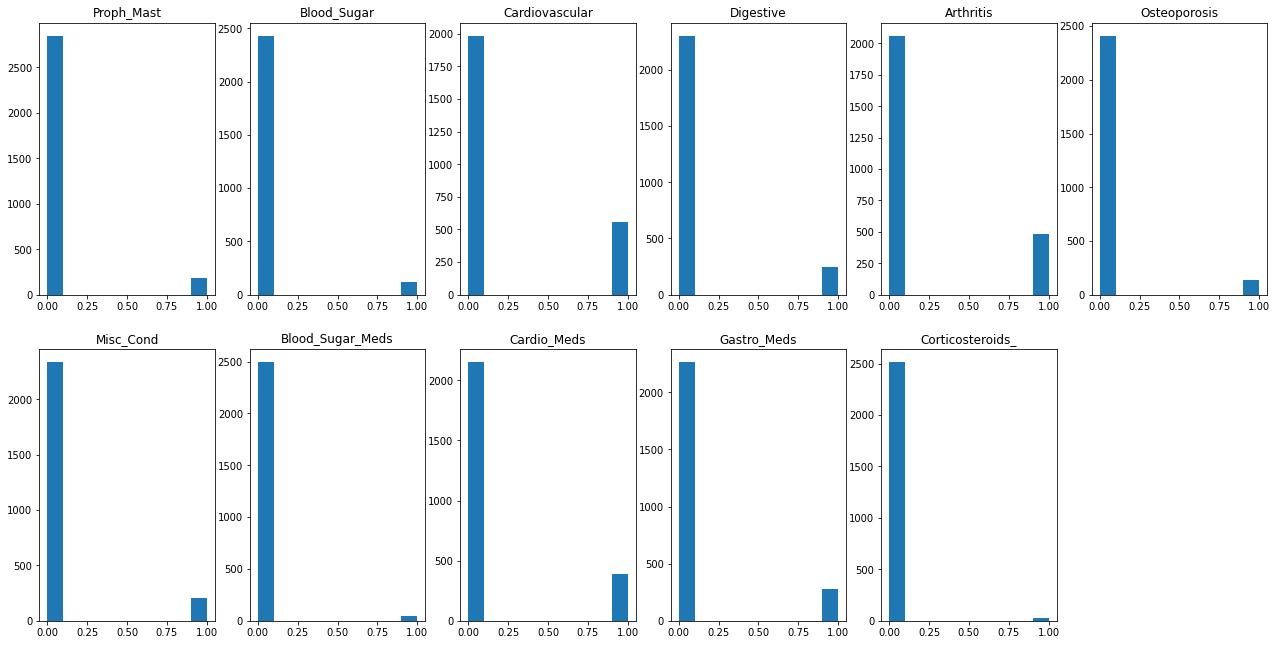

In [ ]:
index = 1
plt.figure(figsize=(22, 11))
for col in cols:
  plt.subplot(2, 6, index)
  values = [i for i in hs[col] if not math.isnan(i)]
  plt.hist(values)
  plt.title(col)
  index += 1

In [ ]:
hs.sort_values(by='ID', ascending=True)

,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_
3087,1002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3086,1003,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3085,1005,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3084,1007,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3083,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,13241,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,13242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13244,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tf

,ID,ss_tot,ss_emot,ss_aff,ss_tang,ss_pos,lv_alone,petownr,church,religion,...,symptom,bloat,sweats,aches,hotflash,tired,totlfevt,dep_log,whi_irs_old,WHI_irs_new
0,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,45,20.0,5.0,10.0,10.0,0.0,1.0,5.0,3.0,...,0.057,0.0,0.0,0.0,0.0,0.0,0.0,0.001438,6.0,1.0
2,1005,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1008,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,13241,36,13.0,5.0,10.0,8.0,1.0,1.0,1.0,3.0,...,0.771,2.0,0.0,1.0,0.0,2.0,1.0,0.001730,11.0,6.0
3084,13242,40,16.0,5.0,9.0,10.0,0.0,1.0,1.0,1.0,...,0.057,0.0,0.0,0.0,1.0,0.0,1.0,0.001730,13.0,8.0
3085,13243,37,14.0,5.0,8.0,10.0,0.0,1.0,1.0,2.0,...,0.457,0.0,2.0,2.0,2.0,2.0,4.0,0.001730,14.0,9.0
3086,13244,38,16.0,4.0,10.0,8.0,0.0,1.0,1.0,2.0,...,0.457,0.0,1.0,1.0,2.0,1.0,1.0,0.001573,13.0,8.0


In [ ]:
tf.columns

Index(['ID', 'ss_tot', 'ss_emot', 'ss_aff', 'ss_tang', 'ss_pos', 'lv_alone',
       'petownr', 'church', 'religion', 'club', 'caregvB', 'strain',
       'optimism', 'nee', 'aee', 'hostil', 'QOL', 'physhealth', 'physfctn',
       'lim_phys', 'pain', 'genhlth', 'mental health', 'lim_emot', 'energy',
       'emotwell', 'socfctn', 'symptom', 'bloat', 'sweats', 'aches',
       'hotflash', 'tired', 'totlfevt', 'dep_log', 'whi_irs_old',
       'WHI_irs_new'],
      dtype='object')

In [ ]:
for label, dataset in datasets.items():
  print(label)
  print(dataset.columns)
  print()

Health Status
Index(['ID', 'hospital_', 'Exam_Freq', 'Proph_Mast', 'Blood_Sugar',
       'Cardiovascular', 'Digestive', 'Arthritis', 'Osteoporosis', 'Misc_Cond',
       'Blood_Sugar_Meds', 'Cardio_Meds', 'Gastro_Meds', 'Corticosteroids_'],
      dtype='object')

Demographics
Index(['ID', 'age at dx', 'age at rand', 'Ethnicity', 'Education',
       'Marital Status', 'Empl. Status', 'Yr Rand'],
      dtype='object')

Medical Measurements
Index(['ID', 'Lump/Mast', 'Radiation', 'Chemo', 'Tumor Type', 'Estr Recep',
       'Prog Recep', 'Node Exam', 'Node Pos', 'Stage', 'Tumor Size', 'Height',
       'Weight', 'BMI', 'Waist', 'Hip', 'Pulse', 'Bld Pres -Sys',
       'Bld Pres - Dias', 'Menopause', 'Anti-Estr Use', 'Anti-Estro Type'],
      dtype='object')

Food from NDS
Index(['ID', 'Recalls', 'last date', 'Kcal', 'Protein(g', 'Total Fat',
       'Total Carb', 'Alcohol', '% Protein', '% Fat', '% Carb', '% Alcohol',
       'Caffeine', 'Calcium', 'Iron', 'Magnesium', 'Phosphorus', 'Potassium',


### Compare visualizations of biomarkers between hospitalized and not hospitalized patients 
Datasets: thoughts and feelings, lifestyle, family history, reproductive history, blood carotenoids

(Baseline exclusively)

In [ ]:
# Merging heath status and blood carotenoids

health_bc = hs.merge(right=bc, how="inner", on="ID")
health_bc.columns
health_bc.shape

(3088, 19)

In [ ]:
# Cleaning and preprocessing health_tf (health status and thoughts/feelings merged)

health_bc.dropna(inplace=True)
drop_idx = health_bc[health_bc['hospital_'] == 6.].index
health_bc.drop(index=drop_idx, inplace=True)
health_bc.shape

# for col in hs.columns:
#   if col != 'ID':
    # print(col)
    # print(health_tf[col].unique())
    # print()

health_bc.head(5)

,ID,hospital_,Exam_Freq,Proph_Mast,Blood_Sugar,Cardiovascular,Digestive,Arthritis,Osteoporosis,Misc_Cond,Blood_Sugar_Meds,Cardio_Meds,Gastro_Meds,Corticosteroids_,lutein,cryptox,lycopene,alphacar,betacar
0,13245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6005,0.3525,1.2404,0.4816,1.2053
1,13244,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5933,0.1300,0.8081,0.2933,1.2226
2,13243,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1742,0.0539,0.7934,0.0260,0.3695
3,13242,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4095,0.3676,0.9904,0.1729,0.6072
4,13241,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.3137,0.0691,0.4105,0.0619,0.1912


In [ ]:
health_bc.shape

(2498, 19)

In [ ]:
# Visualize health_tf

# plt.figure(figsize = (31, 19))
# ax = sns.heatmap(health_tf.corr(), annot = True, fmt = '.2f', linewidth = 0.5)
# props = plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
# plt.title('Health Status and Thoughts/Feelings Correlation', size = 15)

In [ ]:
# cols = hospitalized_bc.columns
# sns.pairplot(hospitalized_bc[[col for col in cols if col != 'ID']], hue = 'hospital_')

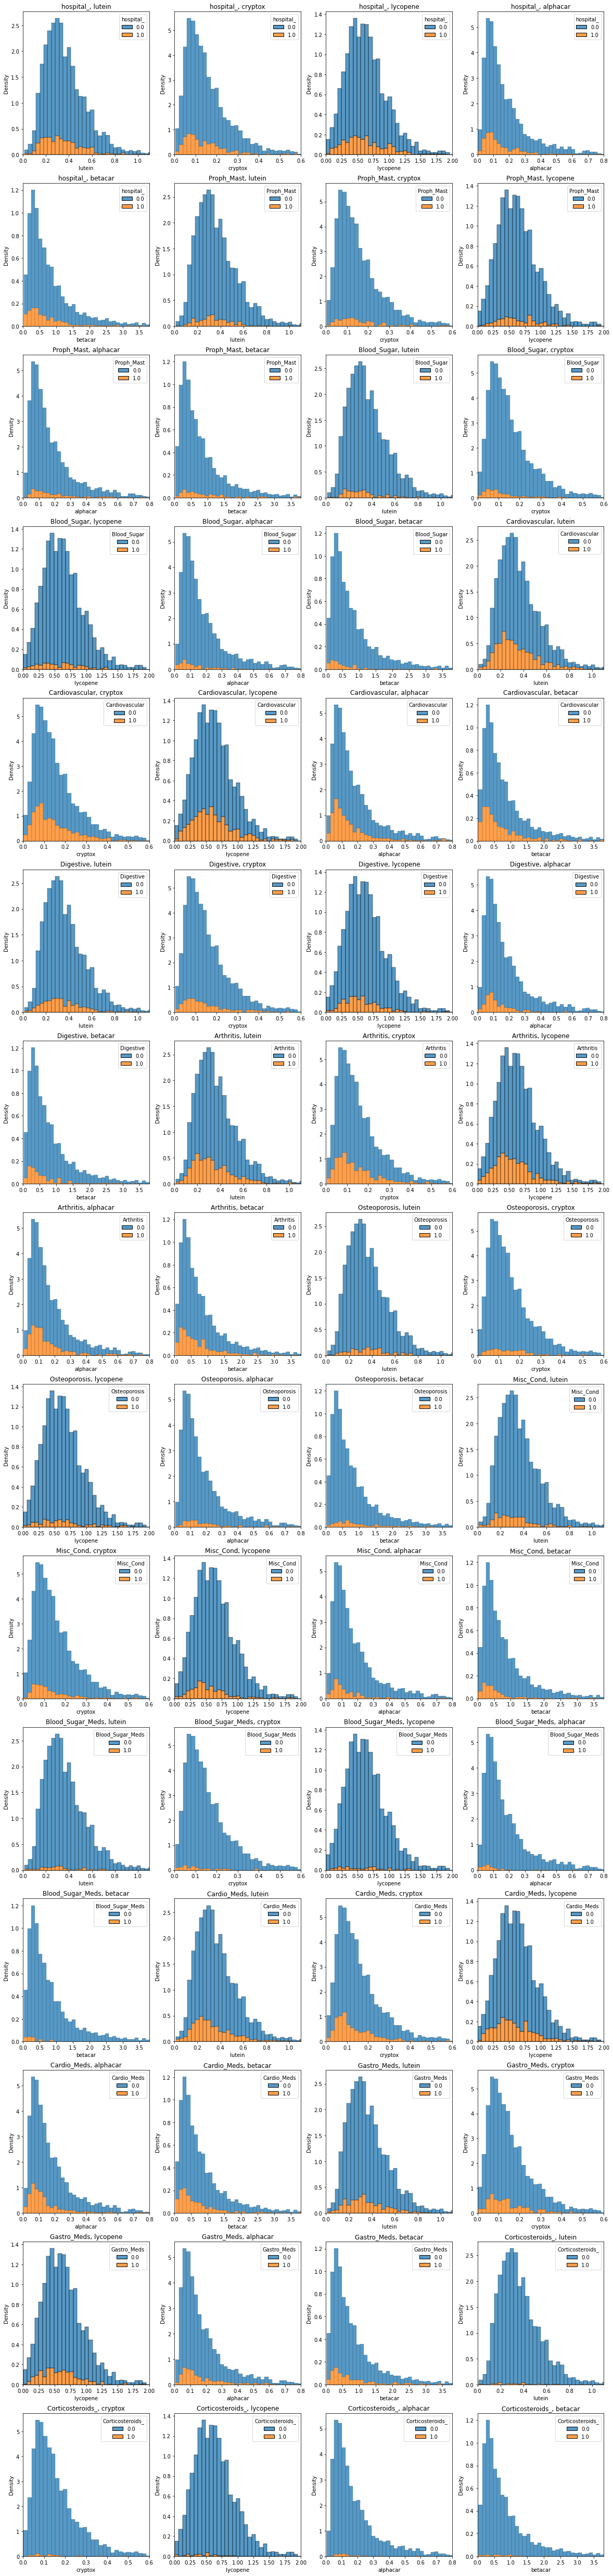

In [ ]:
index = 1
plt.figure(figsize=(20, 90)) # sharey=False
for condition in hs.columns:
  if condition not in ['ID', 'Exam_Freq']:
    for col in bc.columns:
      if col != 'ID':
        if col == 'lutein':
          x = 1.1
        elif col == 'cryptox':
          x = 0.6
        elif col == 'alphacar':
          x = 0.8
        elif col == 'betacar':
          x = 3.8
        else:
          x = 2
        plt.subplot(15, 4, index)
        sns.histplot(health_bc, x=col, hue=condition, multiple='stack', stat='density', common_norm=True);
        plt.xlim(0, x)
        plt.title(f"{condition}, {col}")
        index += 1


In [ ]:
# Merging thoughts/feelings and lifestyle

tfls = tf.merge(right=ls, how="inner", on="ID")
tfls.columns
tfls.shape

(3088, 67)

In [ ]:
tfls.dropna(inplace=True)
tfls.shape

(2086, 67)

In [ ]:
tfls.columns

Index(['ID', 'ss_tot', 'ss_emot', 'ss_aff', 'ss_tang', 'ss_pos', 'lv_alone',
       'petownr', 'church', 'religion', 'club', 'caregvB', 'strain',
       'optimism', 'nee', 'aee', 'hostil', 'QOL', 'physhealth', 'physfctn',
       'lim_phys', 'pain', 'genhlth', 'mental health', 'lim_emot', 'energy',
       'emotwell', 'socfctn', 'symptom', 'bloat', 'sweats', 'aches',
       'hotflash', 'tired', 'totlfevt', 'dep_log', 'whi_irs_old',
       'WHI_irs_new', 'main meals', 'snacks', 'meals out', 'cooking time',
       'adults', 'children', 'I cook?', 'cooking help', 'I clean up?',
       'cleanup help', 'shopping freq', 'grocery bill', 'I buy food?',
       'shopping help', 'weight', 'time at weight', 'pre-BC weight',
       'age18 weight', 'max weight', 'time at max wgt', 'health insurance',
       'insurance change?', 'insurance satisfaction', 'years in state',
       'where born', 'age15 residence', 'age35 residence', 'age50 residence',
       'longest residence'],
      dtype='object')

In [ ]:
tfls = tfls[tfls['longest residence'] != ' '] 

In [ ]:
# Convert string-type columns in tfls to floats

# for col in tfls.columns:
#   if not isinstance(list(tfls[col])[0], float):
#     for x in list(tfls[col]):
#       if isinstance(x, str):
#         print(col)
#         print(f"{x} +{x}+++ {len(x)}")
#       new_x = np.float64(x)

tfls = tfls.astype(float)

In [ ]:
tfls.QOL

7       85.062500
10      74.957031
18      79.019531
19      68.062500
22      89.062500
          ...    
3080    93.125000
3082    93.187500
3083    77.269531
3084    92.875000
3086    73.062500
Name: QOL, Length: 2083, dtype: float64

Text(0.5, 1.0, 'Thoughts/Feelings and Lifestyle Correlation')

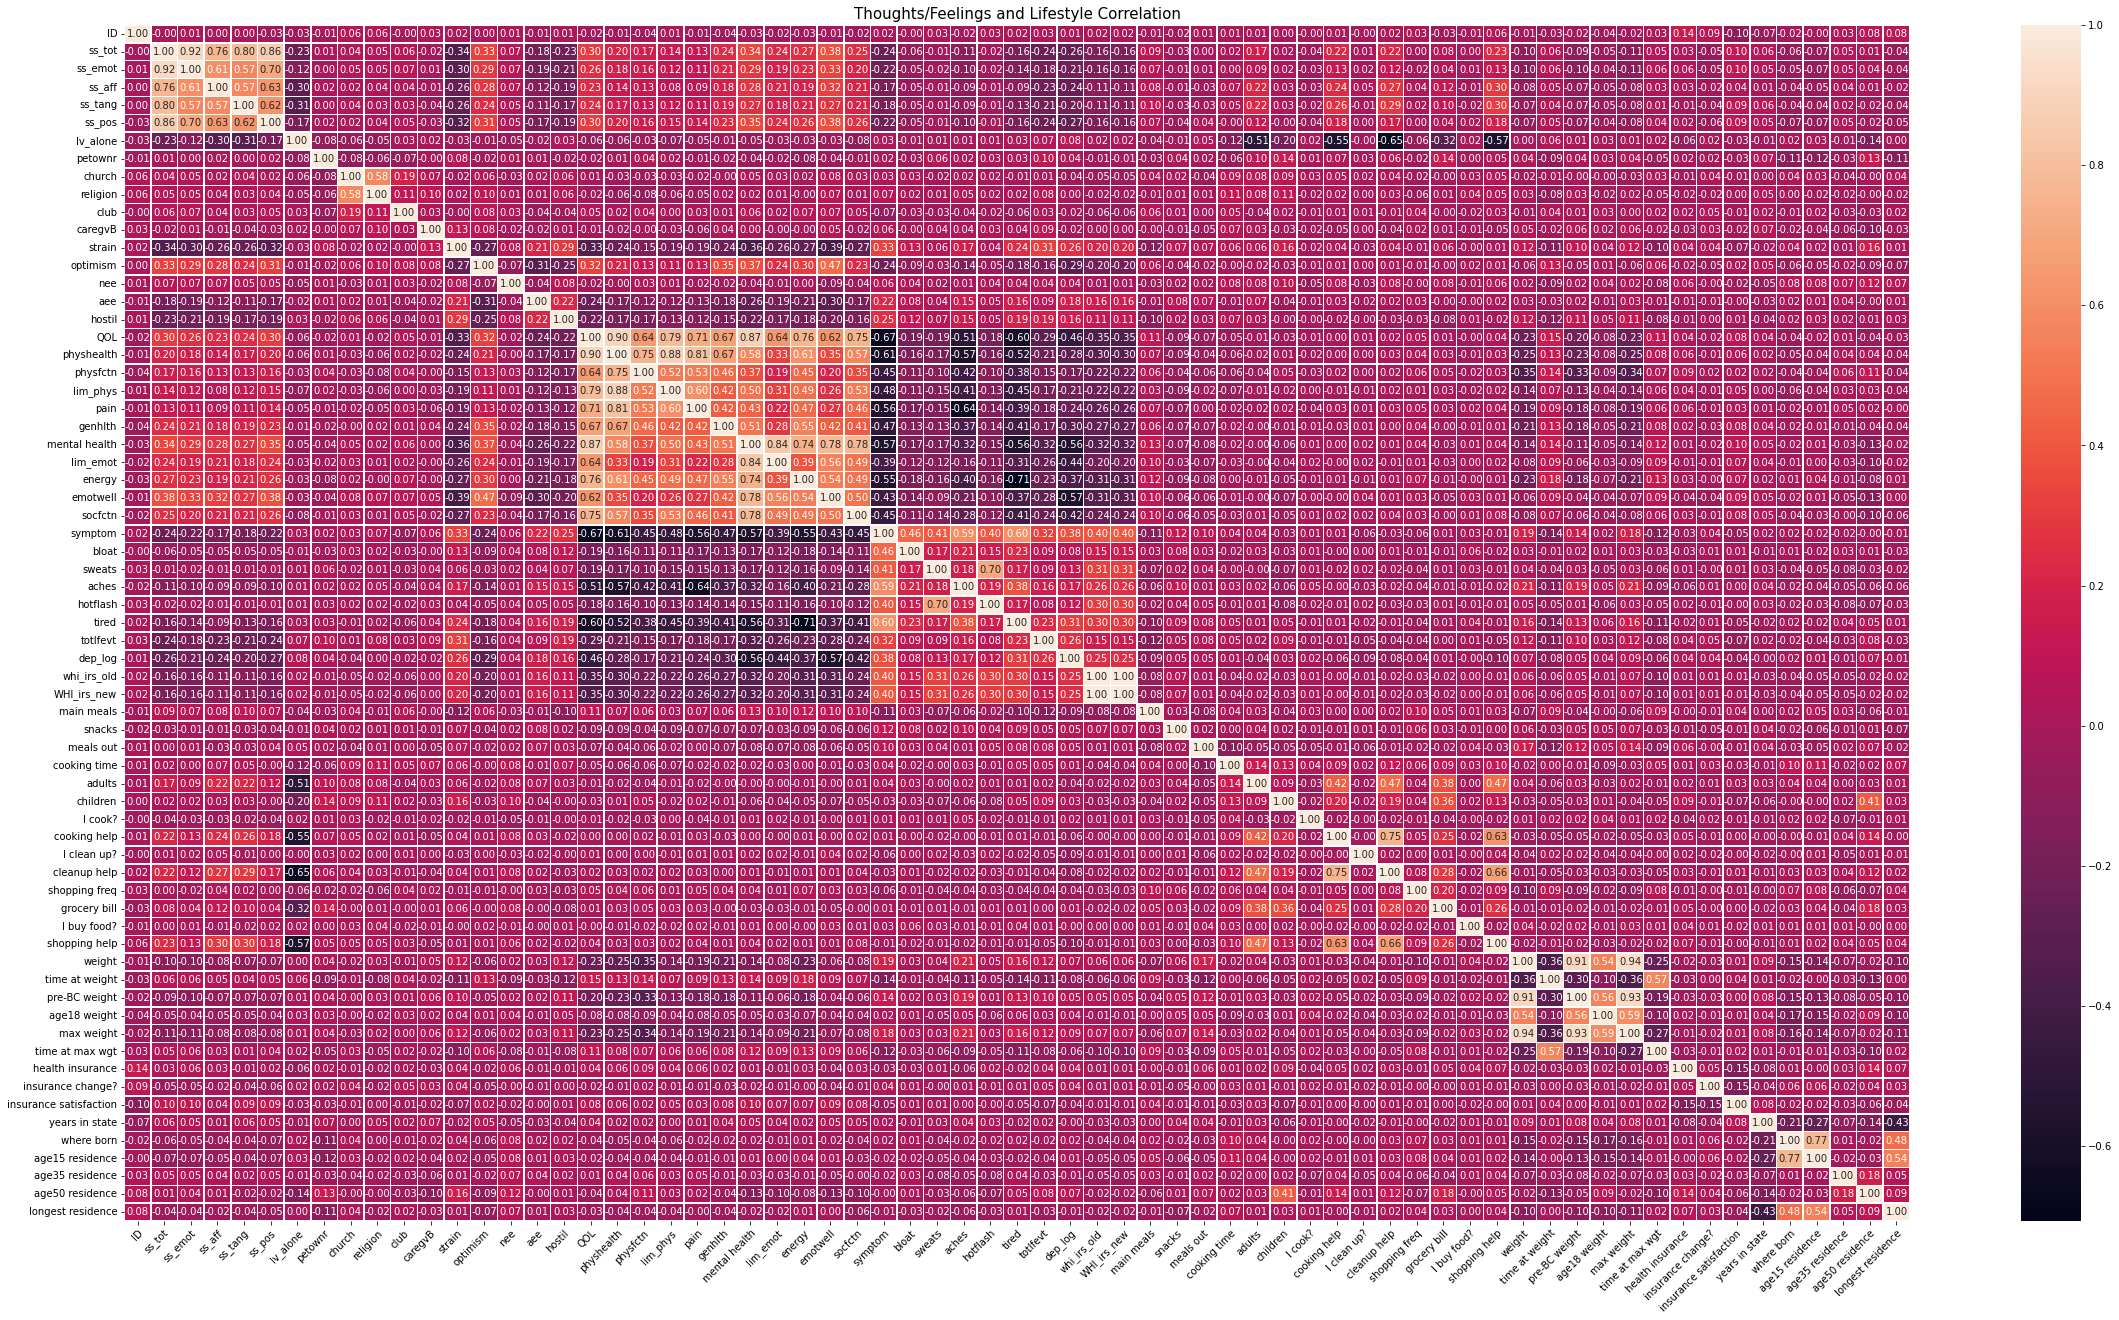

In [ ]:
# Visualize tfls

plt.figure(figsize = (40, 22))
ax = sns.heatmap(tfls.corr(), annot = True, fmt = '.2f', linewidth = 0.5)
props = plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('Thoughts/Feelings and Lifestyle Correlation', size = 15)

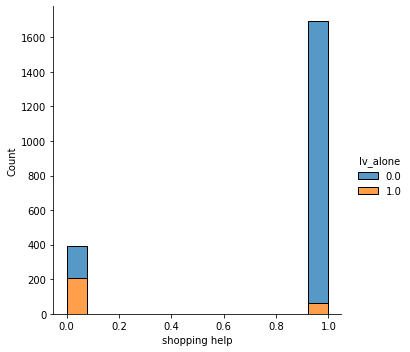

In [ ]:
sns.displot(data=tfls, x='shopping help', hue='lv_alone', multiple='stack')

In [ ]:
ls.columns

Index(['ID', 'main meals', 'snacks', 'meals out', 'cooking time', 'adults',
       'children', 'I cook?', 'cooking help', 'I clean up?', 'cleanup help',
       'shopping freq', 'grocery bill', 'I buy food?', 'shopping help',
       'weight', 'time at weight', 'pre-BC weight', 'age18 weight',
       'max weight', 'time at max wgt', 'health insurance',
       'insurance change?', 'insurance satisfaction', 'years in state',
       'where born', 'age15 residence', 'age35 residence', 'age50 residence',
       'longest residence'],
      dtype='object')

In [ ]:
corr = tfls.corr().columns

In [ ]:
og = tfls.columns

In [ ]:
for x in og:
  if x not in corr:
    print(x)